**--------------
#MODULE 1    DATA COLLECTION AND UNDERSTANDING FOR SMART ENERGY ANALYSIS
-----------------------**


**#PROJECT SCOPE:
#The Smart Energy Consumption Analysis and Prediction System aims to analyze device-level electricity
#usage in a smart home environment using machine learning and deep learning techniques. 
#The system collects timestamped energy readings from various home appliances, processes the data,
#identifies consumption patterns, and predicts future energy usage. It also provides interactive
#visualizations, smart suggestions, and a web-based dashboard for monitoring energy usage in real time.
#The project focuses on improving energy efficiency, reducing electricity costs, and supporting sustainable 
#usage behavior.

#FUNCTIONAL OBJECTIVES:
#Collect and clean smart home energy data
#Analyze device-wise consumption
#Predict future usage using ML & LSTM**


**#importing pandas and loading dataset**

In [2]:
import pandas as pd
df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv")
df.head()


,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


**#for checking data types**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   home_id       int64  
 1   timestamp     object 
 2   device_id     object 
 3   device_type   object 
 4   room          object 
 5   status        object 
 6   power_watt    float64
 7   user_present  int64  
 8   activity      object 
 9   indoor_temp   float64
 10  outdoor_temp  float64
 11  humidity      float64
 12  light_level   float64
 13  day_of_week   int64  
 14  hour_of_day   int64  
 15  price_kWh     int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 213.9+ MB


**# df.isnull() checks each cell for missing values (True = missing, False = not missing)**

In [4]:
df.isnull()

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1751998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**# df.isnull().sum() counts the total number of missing (null) values in each column**

In [5]:

df.isnull().sum()

home_id         0
timestamp       0
device_id       0
device_type     0
room            0
status          0
power_watt      0
user_present    0
activity        0
indoor_temp     0
outdoor_temp    0
humidity        0
light_level     0
day_of_week     0
hour_of_day     0
price_kWh       0
dtype: int64

In [6]:
df.columns

Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

In [7]:
df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
mean,5.500000e+00,1.199867e+02,7.866553e-01,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,2.252036e+02,4.096692e-01,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,0.000000e+00,1.000000e+00,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,2.181600e+02,1.000000e+00,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03
max,1.000000e+01,3.482295e+03,1.000000e+00,4.320000e+01,4.120000e+01,1.000000e+02,1.000000e+03,6.000000e+00,2.300000e+01,3.000000e+03


**#to check duplicated values (sum--counts how many duplicate rows are present in the dataset)**

In [8]:

df.duplicated().sum()

0

**#remove duplicates if any**

In [9]:
df=df.drop_duplicates()

In [10]:
df.describe(include='all')

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1752000,1752000,1752000,1752000,1752000,1.752000e+06,1.752000e+06,1752000,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
unique,NaN,35040,50,5,4,2,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2022-01-01 00:00:00,air_conditioner1,air_conditioner,living_room,off,NaN,NaN,sleeping,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50,35040,350400,700800,1151365,NaN,NaN,582955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.500000e+00,NaN,NaN,NaN,NaN,NaN,1.199867e+02,7.866553e-01,NaN,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,NaN,NaN,NaN,NaN,NaN,2.252036e+02,4.096692e-01,NaN,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,NaN,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00,NaN,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,NaN,NaN,NaN,NaN,NaN,2.181600e+02,1.000000e+00,NaN,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03


**#check shape(size of dataset(rows,columns))**

In [11]:

df.shape


(1752000, 16)

In [12]:
df.columns

Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

In [13]:
df.dtypes

home_id           int64
timestamp        object
device_id        object
device_type      object
room             object
status           object
power_watt      float64
user_present      int64
activity         object
indoor_temp     float64
outdoor_temp    float64
humidity        float64
light_level     float64
day_of_week       int64
hour_of_day       int64
price_kWh         int64
dtype: object

**#to see number of rows**

In [14]:
df.shape[0]

1752000

**#to see number of columns**

In [15]:
df.shape[1]

16

**#task4 finding outliers
#outlier=a value that is extremely high or low compared to other values**

In [16]:
df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06,1.752000e+06
mean,5.500000e+00,1.199867e+02,7.866553e-01,2.119561e+01,2.119547e+01,6.048777e+01,2.548263e+02,3.005479e+00,1.150000e+01,2.250000e+03
std,2.872282e+00,2.252036e+02,4.096692e-01,8.014708e+00,7.930646e+00,1.889061e+01,2.777288e+02,1.999993e+00,6.922189e+00,5.590172e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,4.000000e+00,2.370000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03
25%,3.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,1.520000e+01,4.510000e+01,4.710000e+01,1.000000e+00,5.750000e+00,1.500000e+03
50%,5.500000e+00,0.000000e+00,1.000000e+00,2.030000e+01,2.030000e+01,5.940000e+01,9.240000e+01,3.000000e+00,1.150000e+01,2.500000e+03
75%,8.000000e+00,2.181600e+02,1.000000e+00,2.650000e+01,2.650000e+01,7.170000e+01,4.238000e+02,5.000000e+00,1.725000e+01,2.500000e+03
max,1.000000e+01,3.482295e+03,1.000000e+00,4.320000e+01,4.120000e+01,1.000000e+02,1.000000e+03,6.000000e+00,2.300000e+01,3.000000e+03


**#select only numeric columns**

In [17]:
numeric_cols=df.select_dtypes(include=['float64','int64']).columns
numeric_cols

Index(['home_id', 'power_watt', 'user_present', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')

**#to check outliers using IQR method**

In [18]:

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 100821
user_present → Number of outliers: 373780
indoor_temp → Number of outliers: 0
outdoor_temp → Number of outliers: 0
humidity → Number of outliers: 0
light_level → Number of outliers: 6400
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


**#to remove outliers**

In [19]:

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [20]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 1486
user_present → Number of outliers: 0
indoor_temp → Number of outliers: 15208
outdoor_temp → Number of outliers: 16647
humidity → Number of outliers: 0
light_level → Number of outliers: 95477
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


In [21]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [22]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col} → Number of outliers: {outliers.shape[0]}")

home_id → Number of outliers: 0
power_watt → Number of outliers: 0
user_present → Number of outliers: 0
indoor_temp → Number of outliers: 2934
outdoor_temp → Number of outliers: 1139
humidity → Number of outliers: 0
light_level → Number of outliers: 19913
day_of_week → Number of outliers: 0
hour_of_day → Number of outliers: 0
price_kWh → Number of outliers: 0


**#task5---summary statistics for all numeric columns**

In [23]:

df.describe()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,947566.000000,947566.000000,947566.0,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000
mean,5.472551,81.511402,1.0,17.343399,17.345025,62.282717,56.191996,3.025549,10.812673,2016.819937
std,2.875604,123.222033,0.0,6.099641,5.997451,18.759503,37.309852,2.005203,8.715048,644.567654
min,1.000000,0.000000,1.0,2.200000,4.000000,26.500000,0.000000,0.000000,0.000000,1500.000000
25%,3.000000,0.000000,1.0,13.100000,13.100000,46.825000,26.700000,1.000000,3.000000,1500.000000
50%,5.000000,0.000000,1.0,16.800000,16.700000,61.400000,54.400000,3.000000,6.000000,1500.000000
75%,8.000000,200.620000,1.0,21.400000,21.400000,73.300000,80.700000,5.000000,20.000000,2500.000000
max,10.000000,500.876106,1.0,34.900000,34.100000,100.000000,176.900000,6.000000,23.000000,3000.000000


**#summary statistics for categorical columns**

In [24]:

df.describe(include='object')

,timestamp,device_id,device_type,room,status,activity
count,947566,947566,947566,947566,947566,947566
unique,20802,50,5,4,2,4
top,2022-01-01 00:00:00,light2,light,living_room,off,sleeping
freq,50,20298,199292,396522,633936,559736


**#to check number of unique values in every column**

In [25]:
df.nunique()

home_id            10
timestamp       20802
device_id          50
device_type         5
room                4
status              2
power_watt      35530
user_present        1
activity            4
indoor_temp       327
outdoor_temp      302
humidity          736
light_level      1271
day_of_week         7
hour_of_day        17
price_kWh           3
dtype: int64

In [26]:
df['room'].value_counts()

room
living_room     396522
kitchen         190756
laundry_room    181286
bedroom         179002
Name: count, dtype: int64

In [27]:
df['power_watt'].min()
df['power_watt'].max()

500.87610622881857

In [28]:
df['power_watt'].mean()
df['power_watt'].median()

0.0

In [29]:
df['power_watt'].describe()

count    947566.000000
mean         81.511402
std         123.222033
min           0.000000
25%           0.000000
50%           0.000000
75%         200.620000
max         500.876106
Name: power_watt, dtype: float64

In [30]:
df.corr(numeric_only=True)

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
home_id,1.000000,-0.000624,NaN,0.001405,0.001279,-0.000126,-0.011060,0.003435,-0.009550,-0.002806
power_watt,-0.000624,1.000000,NaN,0.081962,0.083256,-0.010671,-0.024047,-0.009238,0.195631,0.200388
user_present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indoor_temp,0.001405,0.081962,NaN,1.000000,0.981896,-0.418496,0.077326,-0.003775,0.231928,0.270820
outdoor_temp,0.001279,0.083256,NaN,0.981896,1.000000,-0.426418,0.078638,-0.003980,0.235781,0.275585
humidity,-0.000126,-0.010671,NaN,-0.418496,-0.426418,1.000000,-0.002563,-0.002105,-0.018154,-0.013757
light_level,-0.011060,-0.024047,NaN,0.077326,0.078638,-0.002563,1.000000,0.019240,-0.008976,0.151560
day_of_week,0.003435,-0.009238,NaN,-0.003775,-0.003980,-0.002105,0.019240,1.000000,0.003668,0.010014
hour_of_day,-0.009550,0.195631,NaN,0.231928,0.235781,-0.018154,-0.008976,0.003668,1.000000,0.517598
price_kWh,-0.002806,0.200388,NaN,0.270820,0.275585,-0.013757,0.151560,0.010014,0.517598,1.000000


**#histogram(distribution plot)shows how values of power_watt are distributed**

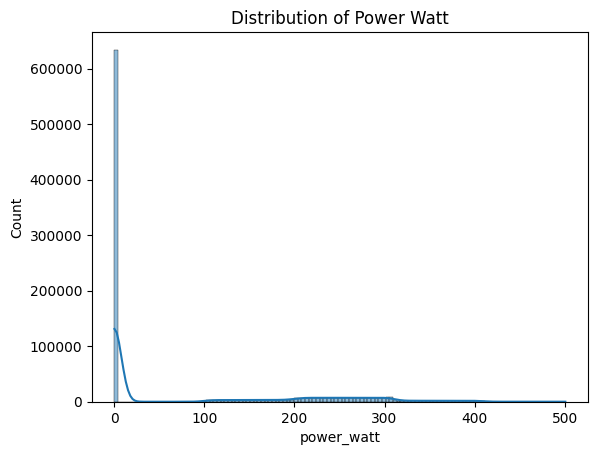

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['power_watt'], kde=True)
plt.title("Distribution of Power Watt")
plt.show()

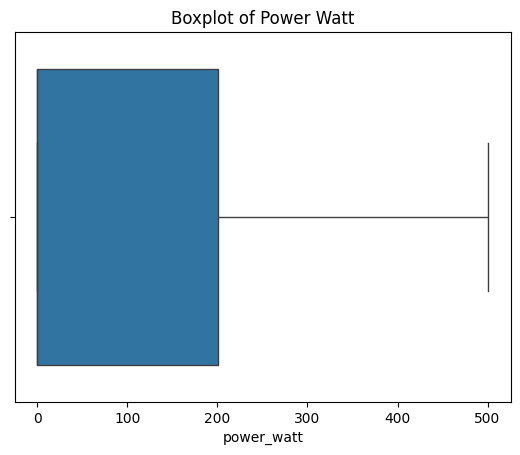

In [32]:
sns.boxplot(x=df['power_watt'])
plt.title("Boxplot of Power Watt")
plt.show()

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [34]:
df=df.sort_values(by=['timestamp','room','device_id'])

In [35]:
grouped = df.groupby(['room', 'device_id', 'device_type', 'timestamp']).sum()
grouped.head()

home_id status  \
room    device_id        device_type     timestamp                             
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00        1    off   
                                         2022-01-01 00:15:00        1    off   
                                         2022-01-01 00:30:00        1    off   
                                         2022-01-01 00:45:00        1    off   
                                         2022-01-01 01:15:00        1    off   

                                                              power_watt  \
room    device_id        device_type     timestamp                         
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         0.0   
                                         2022-01-01 00:15:00         0.0   
                                         2022-01-01 00:30:00         0.0   
                                         2022-01-01 00:45:00         0.0   
                                         2022-01-01 01:15:00         0.0   

                                                              user_present  \
room    device_id        device_type     timestamp                           
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00             1   
                                         2022-01-01 00:15:00             1   
                                         2022-01-01 00:30:00             1   
                                         2022-01-01 00:45:00             1   
                                         2022-01-01 01:15:00             1   

                                                              activity  \
room    device_id        device_type     timestamp                       
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00  sleeping   
                                         2022-01-01 00:15:00  sleeping   
                                         2022-01-01 00:30:00  sleeping   
                                         2022-01-01 00:45:00  sleeping   
                                         2022-01-01 01:15:00  sleeping   

                                                              indoor_temp  \
room    device_id        device_type     timestamp                          
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         11.4   
                                         2022-01-01 00:15:00         11.0   
                                         2022-01-01 00:30:00         10.2   
                                         2022-01-01 00:45:00         12.0   
                                         2022-01-01 01:15:00         12.8   

                                                              outdoor_temp  \
room    device_id        device_type     timestamp                           
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00          11.9   
                                         2022-01-01 00:15:00          11.7   
                                         2022-01-01 00:30:00          11.6   
                                         2022-01-01 00:45:00          11.7   
                                         2022-01-01 01:15:00          11.6   

                                                              humidity  \
room    device_id        device_type     timestamp                       
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00      45.2   
                                         2022-01-01 00:15:00      39.6   
                                         2022-01-01 00:30:00      58.6   
                                         2022-01-01 00:45:00      69.9   
                                         2022-01-01 01:15:00      37.5   

                                                              light_level  \
room    device_id        device_type     timestamp                          
bedroom air_conditioner1 air_conditioner 2022-01-01 00:00:00         73.4   
                                         2022-01-01 00:15:00     

In [36]:
df['timestamp']=pd.to_datetime(df['timestamp'])


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947566 entries, 0 to 1751992
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   home_id       947566 non-null  int64         
 1   timestamp     947566 non-null  datetime64[ns]
 2   device_id     947566 non-null  object        
 3   device_type   947566 non-null  object        
 4   room          947566 non-null  object        
 5   status        947566 non-null  object        
 6   power_watt    947566 non-null  float64       
 7   user_present  947566 non-null  int64         
 8   activity      947566 non-null  object        
 9   indoor_temp   947566 non-null  float64       
 10  outdoor_temp  947566 non-null  float64       
 11  humidity      947566 non-null  float64       
 12  light_level   947566 non-null  float64       
 13  day_of_week   947566 non-null  int64         
 14  hour_of_day   947566 non-null  int64         
 15  price_kWh     947566 

In [38]:
df['timestamp'].head()

0    2022-01-01
45   2022-01-01
5    2022-01-01
10   2022-01-01
15   2022-01-01
Name: timestamp, dtype: datetime64[ns]

**#sorting the dataset by timestamp**


In [39]:
df=df.sort_values(by='timestamp')

**#finding min and max timestamp**

In [40]:
df['timestamp'].min(),df['timestamp'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-31 23:45:00'))

**# Creating a full timestamp range with 15-minute intervals (change if needed)**

In [41]:

full_range = pd.date_range(start=df['timestamp'].min(),
                           end=df['timestamp'].max(),
                           freq='15min')

**#checking missing timestamps**

In [42]:
missing_timestamps = len(full_range) - df['timestamp'].nunique()
missing_timestamps

14238

**#perform exploratory data analysis
#check dataset shape(number of rows and columns are in the dataset)**

In [43]:
df.shape

(947566, 16)

**#summary statistics for numeric columns(df.describe() shows count,mean,min,max,std deviation)**

In [44]:
 
df.describe()

,home_id,timestamp,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,947566.000000,947566,947566.000000,947566.0,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000,947566.000000
mean,5.472551,2022-07-01 10:37:50.391297280,81.511402,1.0,17.343399,17.345025,62.282717,56.191996,3.025549,10.812673,2016.819937
min,1.000000,2022-01-01 00:00:00,0.000000,1.0,2.200000,4.000000,26.500000,0.000000,0.000000,0.000000,1500.000000
25%,3.000000,2022-03-23 03:00:00,0.000000,1.0,13.100000,13.100000,46.825000,26.700000,1.000000,3.000000,1500.000000
50%,5.000000,2022-06-28 03:45:00,0.000000,1.0,16.800000,16.700000,61.400000,54.400000,3.000000,6.000000,1500.000000
75%,8.000000,2022-10-10 23:00:00,200.620000,1.0,21.400000,21.400000,73.300000,80.700000,5.000000,20.000000,2500.000000
max,10.000000,2022-12-31 23:45:00,500.876106,1.0,34.900000,34.100000,100.000000,176.900000,6.000000,23.000000,3000.000000
std,2.875604,NaN,123.222033,0.0,6.099641,5.997451,18.759503,37.309852,2.005203,8.715048,644.567654


**#shows all unique device types in the dataset**

In [45]:
df['device_type'].unique()

array(['air_conditioner', 'washer', 'light', 'tv', 'fridge'], dtype=object)

**#shows all unique room in the dataset**

In [46]:
df['room'].unique()

array(['bedroom', 'laundry_room', 'living_room', 'kitchen'], dtype=object)

**
# Line plot of power over time for a sample device.
# Uses attributes: timestamp (x-axis) and power (y-axis).
# Helps see how a device's energy consumption changes over time.**

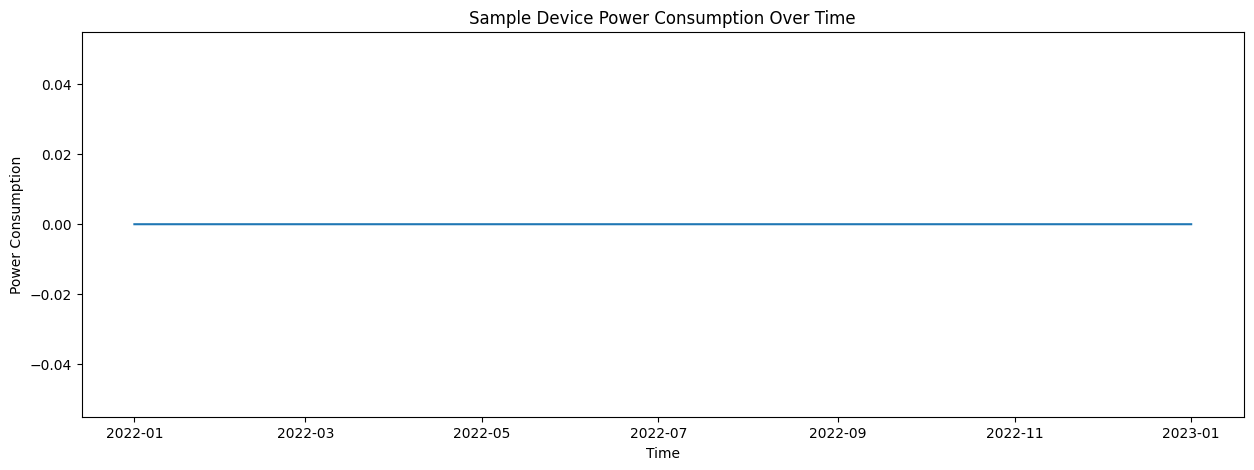

In [47]:

import matplotlib.pyplot as plt

# Select one sample device
sample_device = df[df['device_type'] == df['device_type'].unique()[0]]

plt.figure(figsize=(15,5))
plt.plot(sample_device['timestamp'], sample_device['power_watt'])
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.title("Sample Device Power Consumption Over Time")
plt.show()

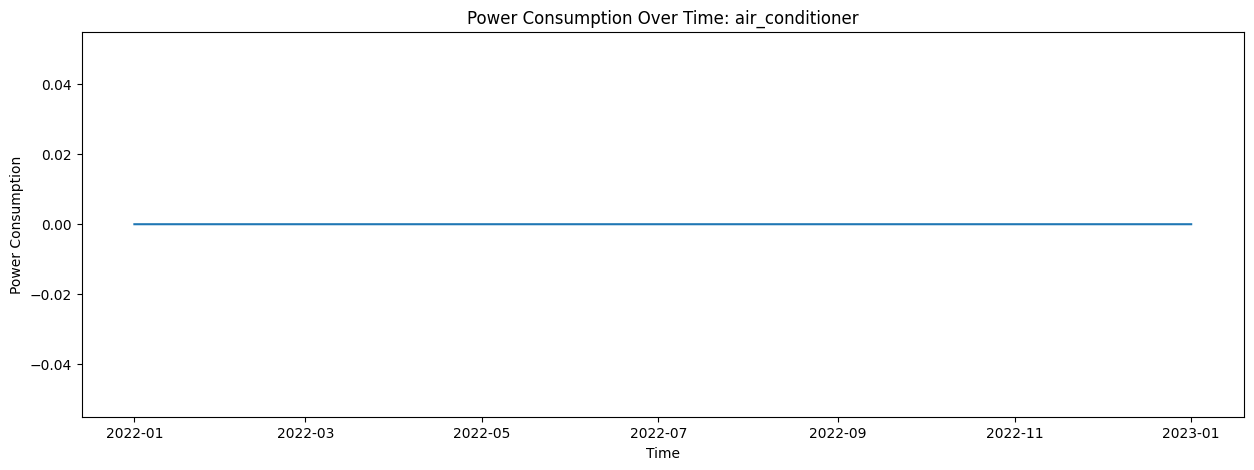

In [48]:


import matplotlib.pyplot as plt

# Select one sample device
sample_device = df[df['device_type'] == df['device_type'].unique()[0]]

plt.figure(figsize=(15,5))
plt.plot(sample_device['timestamp'], sample_device['power_watt'])
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.title(f"Power Consumption Over Time: {df['device_type'].unique()[0]}")
plt.show()

**
# Histogram of power_watt values.
# Uses the 'power_watt' attribute to show distribution of energy consumption.
# Helps understand how many readings fall into low, medium, or high usage.**

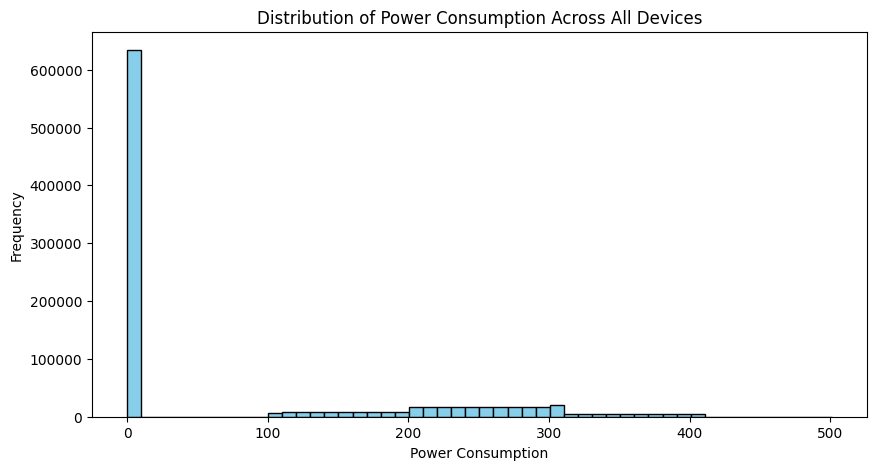

In [49]:


plt.figure(figsize=(10,5))
plt.hist(df['power_watt'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Power Consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Power Consumption Across All Devices")
plt.show()

**
# Boxplot of power values.
# Uses the single attribute 'power_watt' to identify outliers and extremes.
# Helps detect abnormal spikes in energy usage.**

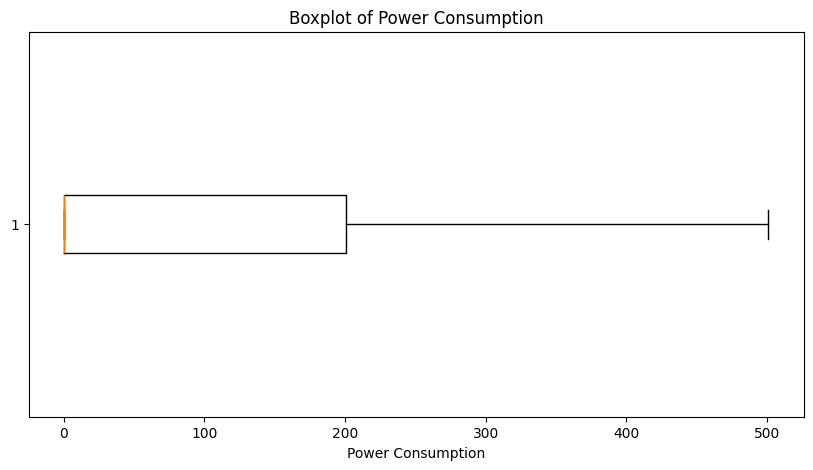

In [50]:


plt.figure(figsize=(10,5))
plt.boxplot(df['power_watt'], vert=False)
plt.xlabel("Power Consumption")
plt.title("Boxplot of Power Consumption")
plt.show()

**
# Countplot of device types.
# Uses the 'device_type' attribute to show how many readings belong to each device.
# Helps identify the most frequently used devices in the dataset.**

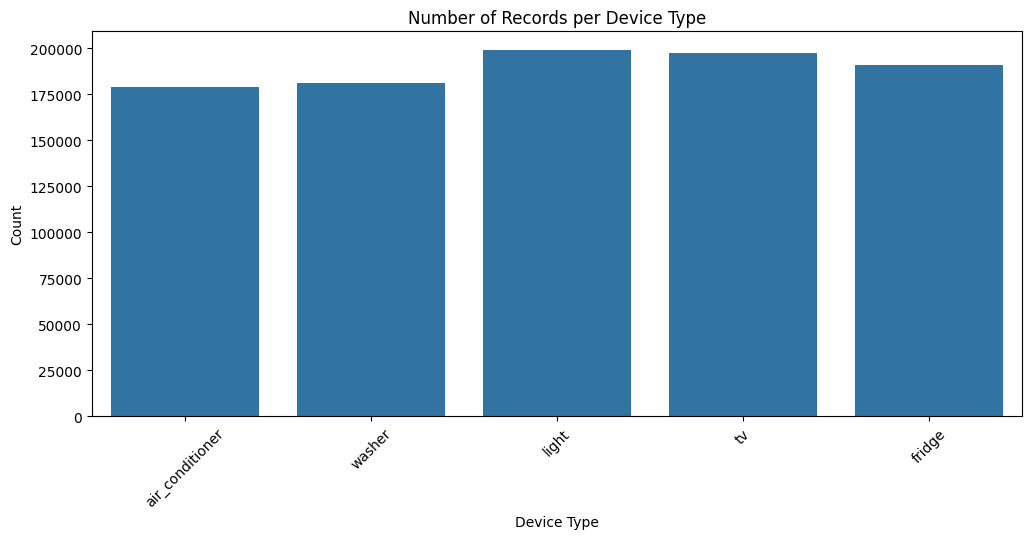

In [51]:



import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x='device_type', data=df)
plt.xticks(rotation=45)
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.title("Number of Records per Device Type")
plt.show()

**
# Bar chart: Total power consumption by each room.
# Uses attributes: 'room' (grouping) and 'power' (sum of energy used).
# Helps understand which room consumes the most electricity.**

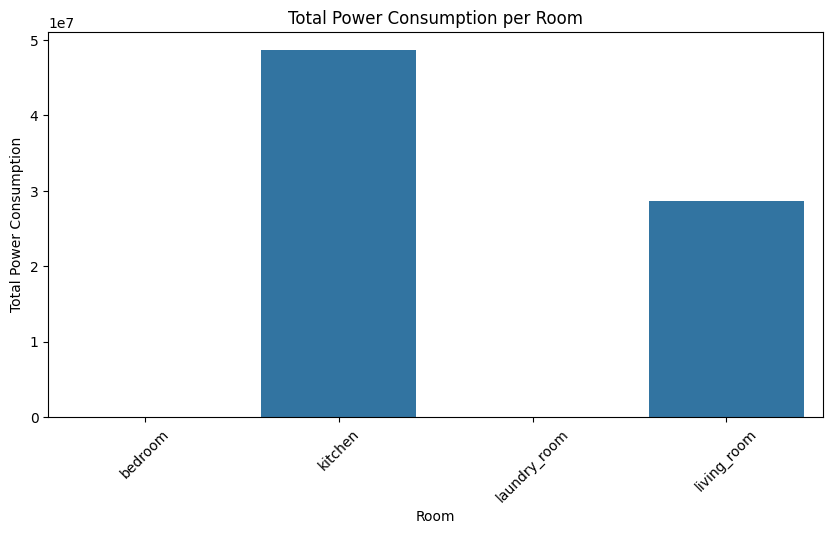

In [52]:



room_power = df.groupby('room')['power_watt'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='room', y='power_watt', data=room_power)
plt.xticks(rotation=45)
plt.xlabel("Room")
plt.ylabel("Total Power Consumption")
plt.title("Total Power Consumption per Room")
plt.show()

**
# Bar chart: Total power consumption by device type.
# Uses attributes: 'device_type' (grouping) and 'power' (sum of energy used).
# Helps identify which type of device is using the most electricity.**

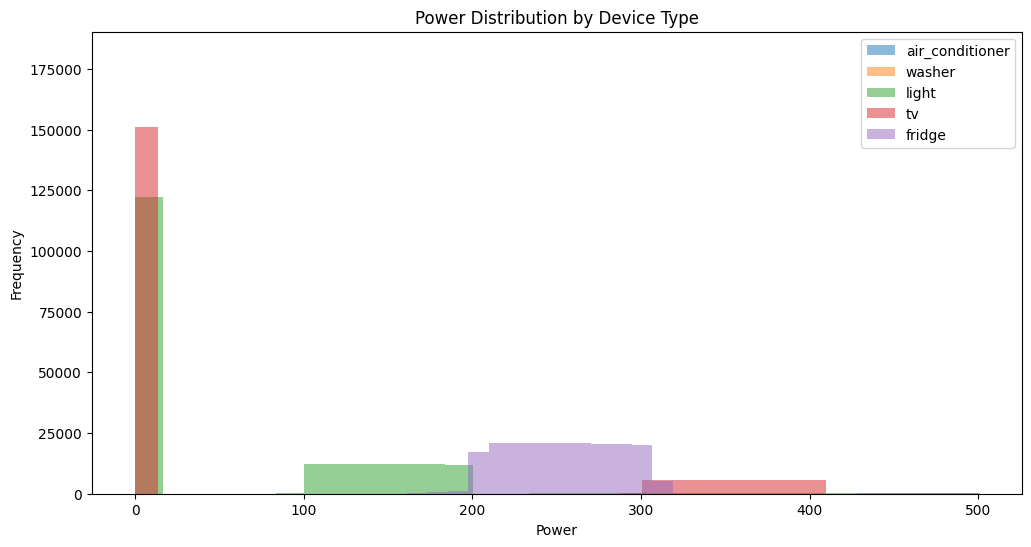

In [53]:


plt.figure(figsize=(12,6))
for device in df['device_type'].unique():
    subset = df[df['device_type'] == device]
    plt.hist(subset['power_watt'], bins=30, alpha=0.5, label=device)
plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Power Distribution by Device Type")
plt.legend()
plt.show()

**# Converting timestamp column to datetime format**

In [54]:

df['timestamp'] = pd.to_datetime(df['timestamp'])

**# Extracting useful time-based features**

In [55]:

df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday

**# Sorting by timestamp before plotting line graph**

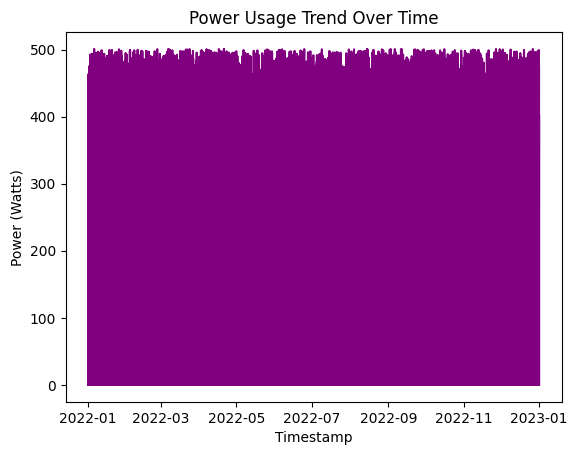

In [56]:

df_sorted = df.sort_values(by='timestamp')

# Line plot of power usage over time
plt.plot(df_sorted['timestamp'], df_sorted['power_watt'], color='purple')
plt.title("Power Usage Trend Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Power (Watts)")
plt.show()

C:\Users\manas\AppData\Local\Temp\ipykernel_26280\3643629954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_power['home_id'],


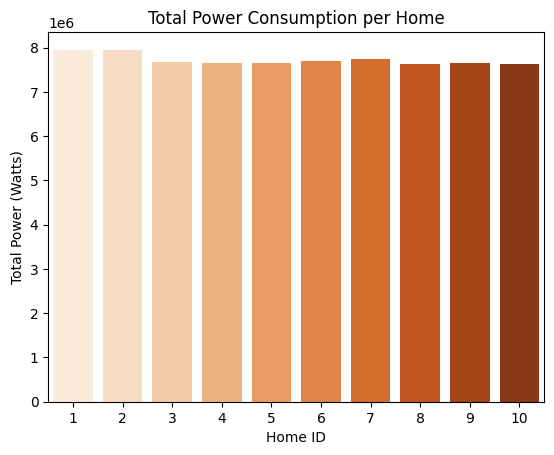

In [57]:
# Sum of power used in each home
home_power = df.groupby('home_id', as_index=False)[['power_watt']].sum()

# Plotting home vs total power consumption using explicit column names
sns.barplot(x=home_power['home_id'], 
            y=home_power['power_watt'], 
            palette='Oranges')

plt.title("Total Power Consumption per Home")
plt.xlabel("Home ID")
plt.ylabel("Total Power (Watts)")
plt.show()

**# Count of user_present true/false**

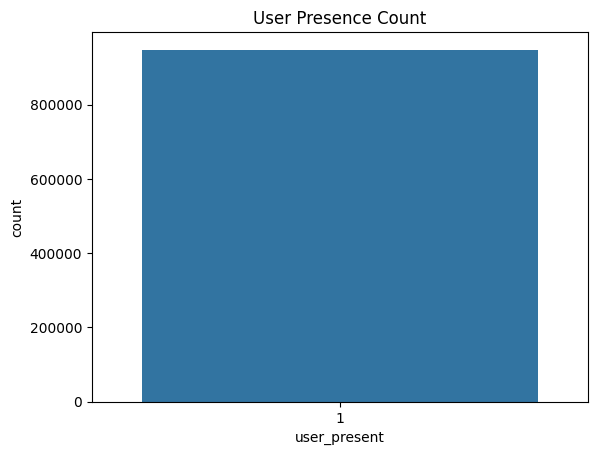

user_present
1    81.511402
Name: power_watt, dtype: float64

In [58]:

sns.countplot(data=df, x='user_present')
plt.title("User Presence Count")
plt.show()

# Average power when user present vs not present
df.groupby('user_present')['power_watt'].mean()

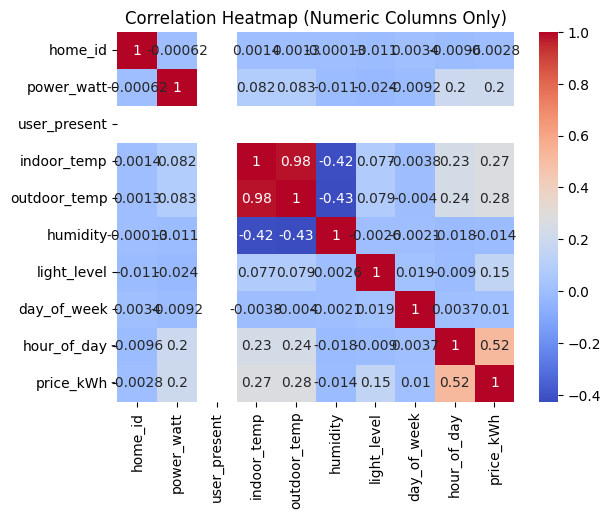

In [59]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
corr = numeric_df.corr()

# Plotting heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

**
# Organizing the dataset in chronological order
# Sorting dataset by timestamp to maintain chronological order.
# This ensures all time-series analysis works correctly.**

In [60]:


df = df.sort_values(by='timestamp')

**
# Group energy readings for each device by time
# Helps analyze energy usage pattern of each device over time.**

In [69]:
device_readings = df.groupby(['device_id', 'timestamp'])['power_watt'].sum().reset_index()
print(device_readings)

                device_id            timestamp  power_watt
0        air_conditioner1  2022-01-01 00:00:00        0.00
1        air_conditioner1  2022-01-01 00:15:00        0.00
2        air_conditioner1  2022-01-01 00:30:00        0.00
3        air_conditioner1  2022-01-01 00:45:00        0.00
4        air_conditioner1  2022-01-01 01:00:00      778.16
...                   ...                  ...         ...
1751995           washer9  2022-12-31 22:45:00      657.95
1751996           washer9  2022-12-31 23:00:00        0.00
1751997           washer9  2022-12-31 23:15:00        0.00
1751998           washer9  2022-12-31 23:30:00        0.00
1751999           washer9  2022-12-31 23:45:00        0.00

[1752000 rows x 3 columns]


**
# Total energy used in each room at each timestamp
# Helps understand which rooms consume the most energy and when.**

In [70]:
room_readings = df.groupby(['room', 'timestamp'])['power_watt'].sum().reset_index()
room_readings.head()
print(room_readings)

               room            timestamp  power_watt
0           bedroom  2022-01-01 00:00:00        0.00
1           bedroom  2022-01-01 00:15:00        0.00
2           bedroom  2022-01-01 00:30:00        0.00
3           bedroom  2022-01-01 00:45:00      773.40
4           bedroom  2022-01-01 01:00:00      778.16
...             ...                  ...         ...
140155  living_room  2022-12-31 22:45:00     1358.03
140156  living_room  2022-12-31 23:00:00      519.56
140157  living_room  2022-12-31 23:15:00        0.00
140158  living_room  2022-12-31 23:30:00        0.00
140159  living_room  2022-12-31 23:45:00      130.65

[140160 rows x 3 columns]


**
# Combined view: which device in which room used what power at what time
# Provides a detailed structure for device-level insights within rooms.**

In [71]:
device_room_readings = df.groupby(['room', 'device_type', 'timestamp'])['power_watt'].sum().reset_index()
print(device_room_readings)

               room      device_type            timestamp  power_watt
0           bedroom  air_conditioner  2022-01-01 00:00:00        0.00
1           bedroom  air_conditioner  2022-01-01 00:15:00        0.00
2           bedroom  air_conditioner  2022-01-01 00:30:00        0.00
3           bedroom  air_conditioner  2022-01-01 00:45:00      773.40
4           bedroom  air_conditioner  2022-01-01 01:00:00      778.16
...             ...              ...                  ...         ...
175195  living_room               tv  2022-12-31 22:45:00      747.51
175196  living_room               tv  2022-12-31 23:00:00      335.50
175197  living_room               tv  2022-12-31 23:15:00        0.00
175198  living_room               tv  2022-12-31 23:30:00        0.00
175199  living_room               tv  2022-12-31 23:45:00        0.00

[175200 rows x 4 columns]


In [72]:
df.info

<bound method DataFrame.info of          home_id            timestamp          device_id      device_type  \
0              1  2022-01-01 00:00:00   air_conditioner1  air_conditioner   
1              1  2022-01-01 00:00:00             light1            light   
2              1  2022-01-01 00:00:00                tv1               tv   
3              1  2022-01-01 00:00:00            fridge1           fridge   
4              1  2022-01-01 00:00:00            washer1           washer   
...          ...                  ...                ...              ...   
1751995       10  2022-12-31 23:45:00  air_conditioner10  air_conditioner   
1751996       10  2022-12-31 23:45:00            light10            light   
1751997       10  2022-12-31 23:45:00               tv10               tv   
1751998       10  2022-12-31 23:45:00           fridge10           fridge   
1751999       10  2022-12-31 23:45:00           washer10           washer   

                 room status   power_watt  

**# Check missing values**

In [73]:
df.isnull().sum()

home_id         0
timestamp       0
device_id       0
device_type     0
room            0
status          0
power_watt      0
user_present    0
activity        0
indoor_temp     0
outdoor_temp    0
humidity        0
light_level     0
day_of_week     0
hour_of_day     0
price_kWh       0
dtype: int64

In [74]:
# Remove rows where timestamp or power_watt is missing
df = df.dropna(subset=['timestamp', 'power_watt'])

# Fill categorical missing values with "Unknown"
categorical_cols = ['device_type', 'room', 'status', 'activity']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Fill numeric missing values with median
numeric_cols = ['indoor_temp', 'outdoor_temp', 'humidity', 'light_level', 'price_kWh']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [75]:
Q1 = df['power_watt'].quantile(0.25)
Q3 = df['power_watt'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['power_watt'] >= lower_limit) & (df['power_watt'] <= upper_limit)]

**
# -----------------------------
# MODULE 2: DATA CLEANING AND PREPROCESSING
# -----------------------------**


In [76]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# -----------------------------
# 1. Load Dataset
# -----------------------------
df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv") 
# change filename
#df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv")

# Display first rows
df.head()

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


In [77]:
# Check missing values 
df.isnull().sum()



home_id         0
timestamp       0
device_id       0
device_type     0
room            0
status          0
power_watt      0
user_present    0
activity        0
indoor_temp     0
outdoor_temp    0
humidity        0
light_level     0
day_of_week     0
hour_of_day     0
price_kWh       0
dtype: int64

**# Fill numeric missing values with median**

In [78]:

df = df.fillna(df.median(numeric_only=True))



In [79]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].isnull().sum()

timestamp      0
device_id      0
device_type    0
room           0
status         0
activity       0
dtype: int64

**# Fill categorical missing values with "Unknown"**

In [80]:

df = df.fillna('Unknown') 

**#Handle Outliers using IQR(numeric columns)**

In [81]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

**#Convert Timestamp to datetime & set index**

In [82]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])  # remove invalid timestamps
df = df.set_index('timestamp')

In [83]:
df.head()

,home_id,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
timestamp,,,,,,,,,,,,,,,
2022-01-01,1,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2022-01-01,1,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2022-01-01,1,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2022-01-01,1,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2022-01-01,1,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


In [84]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=1061436, freq=None)

In [85]:
df.dtypes

home_id           int64
device_id        object
device_type      object
room             object
status           object
power_watt      float64
user_present      int64
activity         object
indoor_temp     float64
outdoor_temp    float64
humidity        float64
light_level     float64
day_of_week       int64
hour_of_day       int64
price_kWh         int64
dtype: object

**#Select only numerical columns for resampling**

In [86]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [87]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               '2022-01-01 00:00:00', '2022-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=1061436, freq=None)

In [88]:
df.dtypes

home_id           int64
device_id        object
device_type      object
room             object
status           object
power_watt      float64
user_present      int64
activity         object
indoor_temp     float64
outdoor_temp    float64
humidity        float64
light_level     float64
day_of_week       int64
hour_of_day       int64
price_kWh         int64
dtype: object

**#Resample(hourly and daily)**

In [89]:
df_hourly = numeric_df.resample('h').mean()
df_daily = numeric_df.resample('D').mean()


In [90]:
df_hourly.head()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
timestamp,,,,,,,,,,
2022-01-01 00:00:00,5.527919,54.861320,1.0,9.327919,9.414213,63.042132,43.283249,5.0,0.0,1500.0
2022-01-01 01:00:00,5.541667,51.579115,1.0,8.142188,8.347396,72.089583,43.889583,5.0,1.0,1500.0
2022-01-01 02:00:00,5.446154,57.646504,1.0,9.371282,9.195897,66.840000,55.292308,5.0,2.0,1500.0
2022-01-01 03:00:00,5.456410,51.101590,1.0,10.749744,10.958462,61.559487,47.458462,5.0,3.0,1500.0
2022-01-01 04:00:00,5.512821,57.850164,1.0,10.922051,11.036410,66.327179,51.762051,5.0,4.0,1500.0


**#Normalize/Scale values
#Normalize all numerical features to a 0–1 range using MinMaxScale **

In [91]:


scaler = MinMaxScaler()

df_hourly_scaled = pd.DataFrame(
    scaler.fit_transform(df_hourly),
    columns=df_hourly.columns,
    index=df_hourly.index
)

In [92]:
df_hourly_scaled.head()

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
timestamp,,,,,,,,,,
2022-01-01 00:00:00,0.804772,0.062683,0.0,0.042466,0.044101,0.500899,0.119799,0.833333,0.000000,0.0
2022-01-01 01:00:00,0.807482,0.038925,0.0,0.000000,0.006321,0.736757,0.121477,0.833333,0.043478,0.0
2022-01-01 02:00:00,0.788658,0.082844,0.0,0.044019,0.036370,0.599906,0.153037,0.833333,0.086957,0.0
2022-01-01 03:00:00,0.790679,0.035468,0.0,0.093387,0.098789,0.462248,0.131355,0.833333,0.130435,0.0
2022-01-01 04:00:00,0.801797,0.084318,0.0,0.099558,0.101549,0.586537,0.143266,0.833333,0.173913,0.0


In [93]:
df_hourly_scaled.describe()
#you will see min close to 0 and max close to 1

,home_id,power_watt,user_present,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
count,6051.000000,6051.000000,6051.0,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000,6051.000000
mean,0.749603,0.266830,0.0,0.363700,0.358810,0.468988,0.248383,0.501460,0.491015,0.422354
std,0.168197,0.251565,0.0,0.213128,0.210911,0.103102,0.234986,0.333516,0.354583,0.424987
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.785496,0.078544,0.0,0.204658,0.201154,0.402694,0.132410,0.166667,0.173913,0.000000
50%,0.795733,0.136799,0.0,0.335541,0.331110,0.470122,0.143774,0.500000,0.347826,0.666667
75%,0.803334,0.394030,0.0,0.469967,0.463618,0.538682,0.167728,0.833333,0.826087,0.666667
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
#Train-Validation-Test Split

train, temp = train_test_split(df_hourly_scaled, test_size=0.2, shuffle=False)
val, test = train_test_split(temp, test_size=0.5, shuffle=False)

train.shape, val.shape, test.shape

((7008, 10), (876, 10), (876, 10))

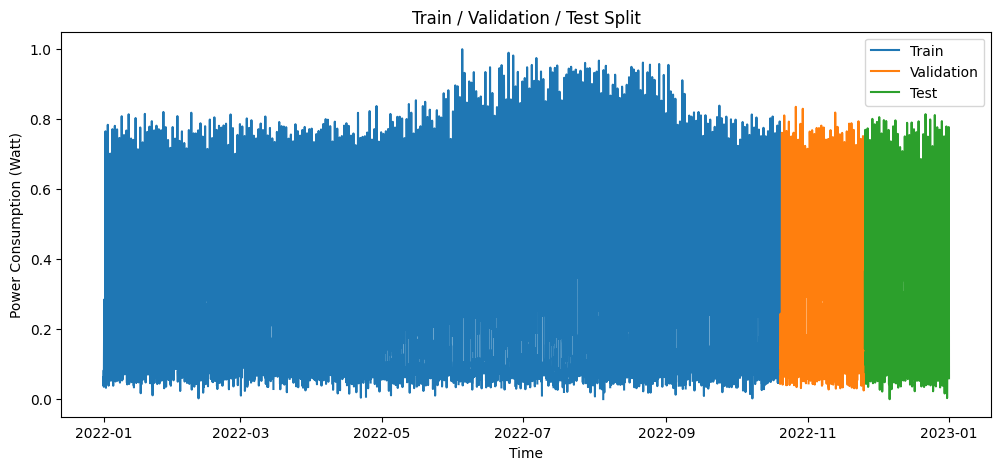

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Plot Train
plt.plot(train.index, train['power_watt'], label='Train')

# Plot Validation
plt.plot(val.index, val['power_watt'], label='Validation')

# Plot Test
plt.plot(test.index, test['power_watt'], label='Test')

plt.xlabel("Time")
plt.ylabel("Power Consumption (Watt)")
plt.title("Train / Validation / Test Split")
plt.legend()
plt.show()

In [96]:
df.columns

Index(['home_id', 'device_id', 'device_type', 'room', 'status', 'power_watt',
       'user_present', 'activity', 'indoor_temp', 'outdoor_temp', 'humidity',
       'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')





**#-------------#Module 3----------------------------------------------------
#-------------Feature Engineering-----------**



In [97]:
import pandas as pd
import numpy as np

In [98]:
import matplotlib.pyplot as plt

In [99]:
import pandas as pd
df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv")
df.head()


,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.88,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.46,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500


**#Extract relevant time-based features (hour, day, week, month trends).**

In [100]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [101]:
df['hour'] = df['timestamp'].dt.hour


In [102]:
df['day'] = df['timestamp'].dt.day


In [103]:
df['day_of_week'] = df['timestamp'].dt.dayofweek


In [104]:
df['week'] = df['timestamp'].dt.isocalendar().week


In [105]:
df['month'] = df['timestamp'].dt.month

In [106]:
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [107]:
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

In [108]:
hourly_usage = df.groupby('hour_of_day')['power_watt'].mean()


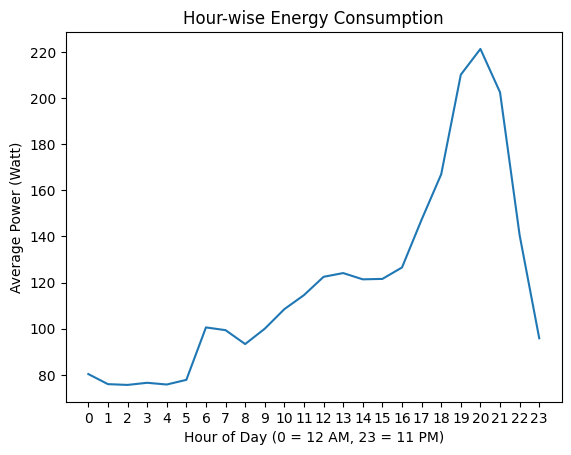

In [109]:
plt.figure()
plt.plot(hourly_usage.index, hourly_usage.values)
plt.xticks(range(0, 24))
plt.xlabel("Hour of Day (0 = 12 AM, 23 = 11 PM)")
plt.ylabel("Average Power (Watt)")
plt.title("Hour-wise Energy Consumption")
plt.show()

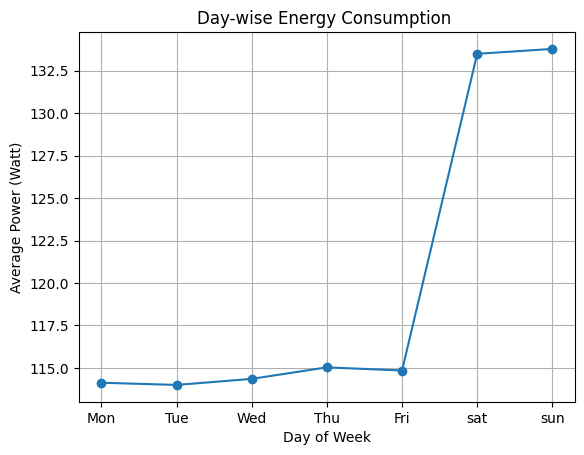

In [110]:
day_usage = df.groupby('day_of_week')['power_watt'].mean()

plt.figure()
plt.plot(day_usage.index, day_usage.values, marker='o')

plt.xticks(
    ticks=[0,1,2,3,4,5,6],
    labels=['Mon','Tue','Wed','Thu','Fri','sat','sun']
)

plt.xlabel("Day of Week")
plt.ylabel("Average Power (Watt)")
plt.title("Day-wise Energy Consumption ")
plt.grid(True)
plt.show()

In [111]:
df['day'].value_counts().sort_index()

day
1     57600
2     57600
3     57600
4     57600
5     57600
6     57600
7     57600
8     57600
9     57600
10    57600
11    57600
12    57600
13    57600
14    57600
15    57600
16    57600
17    57600
18    57600
19    57600
20    57600
21    57600
22    57600
23    57600
24    57600
25    57600
26    57600
27    57600
28    57600
29    52800
30    52800
31    33600
Name: count, dtype: int64

In [112]:
df['day_of_week'] = df['timestamp'].dt.dayofweek

In [113]:
df[['timestamp', 'day_of_week']].head()

,timestamp,day_of_week
0,2022-01-01,5
1,2022-01-01,5
2,2022-01-01,5
3,2022-01-01,5
4,2022-01-01,5


**#Aggregate device-level consumption statistics.**

In [114]:
df = df.sort_values(by=['home_id', 'device_id','timestamp'])

In [115]:
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [116]:
device_stats = df.groupby('device_id')['power_watt'].agg(
    mean_power='mean',
    max_power='max',
    min_power='min',
    std_power='std'
).reset_index()

In [117]:
df = df.merge(device_stats, on='device_id', how='left')

**#Create lag features and moving averages for time series learning**

In [118]:
df['lag_1'] = df.groupby('device_id')['power_watt'].shift(1)
df['lag_2'] = df.groupby('device_id')['power_watt'].shift(2)
df['lag_3'] = df.groupby('device_id')['power_watt'].shift(3)

In [119]:
df['rolling_mean_3'] = df.groupby('device_id')['power_watt']\
                          .transform(lambda x: x.rolling(3).mean())

df['rolling_mean_7'] = df.groupby('device_id')['power_watt']\
                          .transform(lambda x: x.rolling(7).mean())

In [120]:
df['rolling_std_7'] = df.groupby('device_id')['power_watt']\
                         .transform(lambda x: x.rolling(7).std())

In [121]:
df=df.dropna()

In [122]:
features = [
    'hour_of_day', 'day_of_week', 'month', 'is_weekend',
    'user_present', 'indoor_temp', 'outdoor_temp', 'humidity',
    'light_level', 'price_kWh',
    'mean_power', 'max_power', 'min_power', 'std_power',
    'lag_1', 'lag_2', 'lag_3',
    'rolling_mean_3', 'rolling_mean_7'
]

X = df[features]
y = df['power_watt']

In [123]:
X.head(), y.head()

(    hour_of_day  day_of_week  month  is_weekend  user_present  indoor_temp  \
 6             1            5      1           1             1          3.9   
 7             1            5      1           1             1          3.3   
 8             2            5      1           1             1         10.6   
 9             2            5      1           1             1         10.9   
 10            2            5      1           1             1         11.0   
 
     outdoor_temp  humidity  light_level  price_kWh  mean_power    max_power  \
 6            5.2      92.7         61.5       1500  212.098051  3366.800747   
 7            4.1      89.1         28.6       1500  212.098051  3366.800747   
 8           11.2      43.7         43.5       1500  212.098051  3366.800747   
 9           11.7      41.1         12.3       1500  212.098051  3366.800747   
 10          11.7      59.9         90.6       1500  212.098051  3366.800747   
 
     min_power  std_power  lag_1   lag_2  

In [124]:
df.columns

Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh',
       'hour', 'day', 'week', 'month', 'is_weekend', 'is_peak_hour',
       'mean_power', 'max_power', 'min_power', 'std_power', 'lag_1', 'lag_2',
       'lag_3', 'rolling_mean_3', 'rolling_mean_7', 'rolling_std_7'],
      dtype='object')

In [11]:
#Load Dataset & Convert Time Column

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Smart Home Energy Consumption Optimization (1).csv")

#converting timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [12]:
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


In [13]:
df['is_peak_hour'] = df['hour_of_day'].between(18, 22).astype(int)


In [14]:
#df[['timestamp', 'hour', 'day_of_week', 'is_weekend', 'is_peak_hour']].head()
df[['timestamp', 'hour_of_day', 'day_of_week', 'is_weekend', 'is_peak_hour']].head()



,timestamp,hour_of_day,day_of_week,is_weekend,is_peak_hour
0,2022-01-01,0,5,1,0
1,2022-01-01,0,5,1,0
2,2022-01-01,0,5,1,0
3,2022-01-01,0,5,1,0
4,2022-01-01,0,5,1,0


In [15]:
df.columns


Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh',
       'is_weekend', 'is_peak_hour'],
      dtype='object')

In [16]:
#Extract Time-Based Features

df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['week'] = df['timestamp'].dt.isocalendar().week
df['month'] = df['timestamp'].dt.month

#creating weekend and peak hours features

df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)


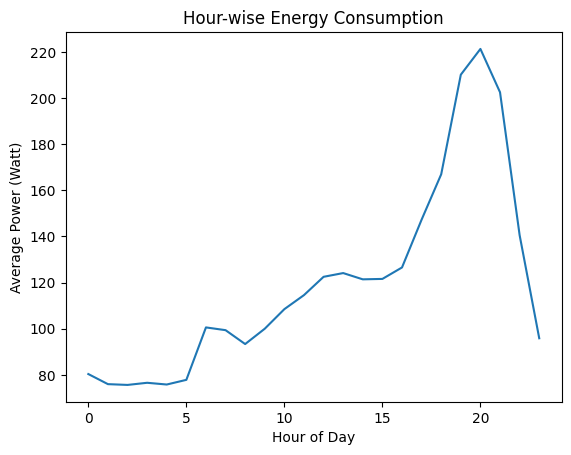

In [17]:
#Time-Based Visualization

hourly_usage = df.groupby('hour')['power_watt'].mean()

plt.figure()
plt.plot(hourly_usage.index, hourly_usage.values)
plt.xlabel("Hour of Day")
plt.ylabel("Average Power (Watt)")
plt.title("Hour-wise Energy Consumption")
plt.show()


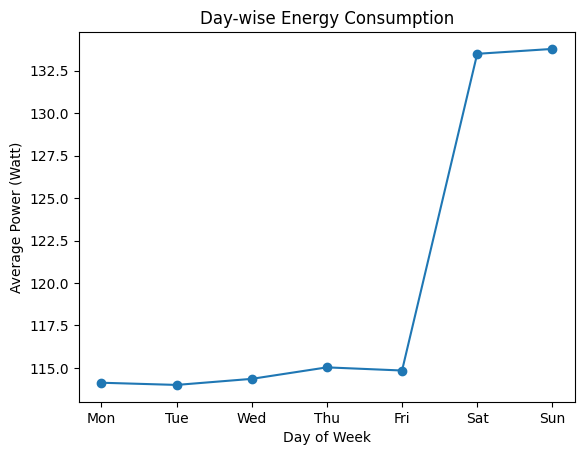

In [18]:
day_usage = df.groupby('day_of_week')['power_watt'].mean()

plt.figure()
plt.plot(day_usage.index, day_usage.values, marker='o')
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel("Day of Week")
plt.ylabel("Average Power (Watt)")
plt.title("Day-wise Energy Consumption")
plt.show()


In [19]:
#Sort Data for Time Series

df = df.sort_values(by=['home_id', 'device_id', 'timestamp'])


In [20]:
#Device-Level Aggregation

device_stats = df.groupby('device_id')['power_watt'].agg(
    mean_power='mean',
    max_power='max',
    min_power='min',
    std_power='std'
).reset_index()

df = df.merge(device_stats, on='device_id', how='left')


In [21]:
df[['device_id', 'mean_power', 'max_power', 'min_power', 'std_power']].head()


,device_id,mean_power,max_power,min_power,std_power
0,air_conditioner1,212.098051,3366.800747,0.0,419.7185
1,air_conditioner1,212.098051,3366.800747,0.0,419.7185
2,air_conditioner1,212.098051,3366.800747,0.0,419.7185
3,air_conditioner1,212.098051,3366.800747,0.0,419.7185
4,air_conditioner1,212.098051,3366.800747,0.0,419.7185


In [22]:
#Create Lag Features
df['lag_1'] = df.groupby('device_id')['power_watt'].shift(1)
df['lag_2'] = df.groupby('device_id')['power_watt'].shift(2)
df['lag_3'] = df.groupby('device_id')['power_watt'].shift(3)


In [23]:
df[['device_id', 'power_watt', 'lag_1', 'lag_2', 'lag_3']].head(10)


,device_id,power_watt,lag_1,lag_2,lag_3
0,air_conditioner1,0.00,NaN,NaN,NaN
1,air_conditioner1,0.00,0.00,NaN,NaN
2,air_conditioner1,0.00,0.00,0.00,NaN
3,air_conditioner1,0.00,0.00,0.00,0.00
4,air_conditioner1,778.16,0.00,0.00,0.00
5,air_conditioner1,0.00,778.16,0.00,0.00
6,air_conditioner1,0.00,0.00,778.16,0.00
7,air_conditioner1,0.00,0.00,0.00,778.16
8,air_conditioner1,0.00,0.00,0.00,0.00
9,air_conditioner1,0.00,0.00,0.00,0.00


In [24]:
#Create Rolling Window Features

df['rolling_mean_3'] = df.groupby('device_id')['power_watt'] \
                          .transform(lambda x: x.rolling(3).mean())

df['rolling_mean_7'] = df.groupby('device_id')['power_watt'] \
                          .transform(lambda x: x.rolling(7).mean())

df['rolling_std_7'] = df.groupby('device_id')['power_watt'] \
                          .transform(lambda x: x.rolling(7).std())


In [25]:
df[['power_watt', 'rolling_mean_3', 'rolling_mean_7', 'rolling_std_7']].head(10)


,power_watt,rolling_mean_3,rolling_mean_7,rolling_std_7
0,0.00,NaN,NaN,NaN
1,0.00,NaN,NaN,NaN
2,0.00,0.000000,NaN,NaN
3,0.00,0.000000,NaN,NaN
4,778.16,259.386667,NaN,NaN
5,0.00,259.386667,NaN,NaN
6,0.00,259.386667,111.165714,294.116834
7,0.00,0.000000,111.165714,294.116834
8,0.00,0.000000,111.165714,294.116834
9,0.00,0.000000,111.165714,294.116834


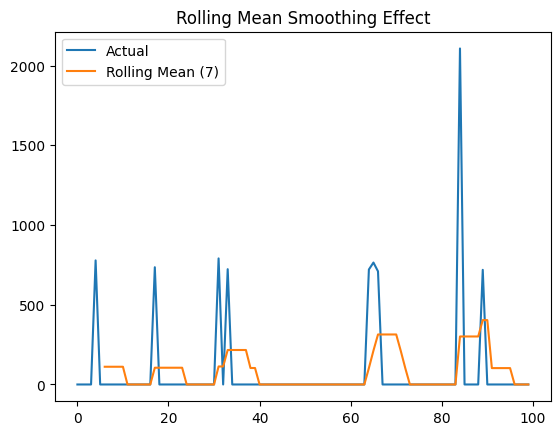

In [26]:
plt.figure()
plt.plot(df['power_watt'].iloc[:100], label='Actual')
plt.plot(df['rolling_mean_7'].iloc[:100], label='Rolling Mean (7)')
plt.legend()
plt.title("Rolling Mean Smoothing Effect")
plt.show()


In [27]:
#Handle Missing Values

df = df.dropna()


In [28]:
print("Before cleaning:", df.shape)
df = df.dropna()
print("After cleaning:", df.shape)


Before cleaning: (1751700, 32)
After cleaning: (1751700, 32)


**#Prepare final feature set for ML model input**

In [29]:
#Select Final Feature Set

features = [
    'hour', 'day_of_week', 'month', 'is_weekend', 'is_peak_hour',
    'user_present', 'indoor_temp', 'outdoor_temp', 'humidity',
    'light_level', 'price_kWh',
    'mean_power', 'max_power', 'min_power', 'std_power',
    'lag_1', 'lag_2', 'lag_3',
    'rolling_mean_3', 'rolling_mean_7', 'rolling_std_7'
]

X = df[features]
y = df['power_watt']


In [30]:
#Save Output of Module 3

final_df = X.copy()
final_df['power_watt'] = y

final_df.to_csv("module3_feature_engineered_data.csv", index=False)


In [31]:
X.head()


,hour,day_of_week,month,is_weekend,is_peak_hour,user_present,indoor_temp,outdoor_temp,humidity,light_level,...,mean_power,max_power,min_power,std_power,lag_1,lag_2,lag_3,rolling_mean_3,rolling_mean_7,rolling_std_7
6,1,5,1,1,0,1,3.9,5.2,92.7,61.5,...,212.098051,3366.800747,0.0,419.7185,0.0,778.16,0.00,259.386667,111.165714,294.116834
7,1,5,1,1,0,1,3.3,4.1,89.1,28.6,...,212.098051,3366.800747,0.0,419.7185,0.0,0.00,778.16,0.000000,111.165714,294.116834
8,2,5,1,1,0,1,10.6,11.2,43.7,43.5,...,212.098051,3366.800747,0.0,419.7185,0.0,0.00,0.00,0.000000,111.165714,294.116834
9,2,5,1,1,0,1,10.9,11.7,41.1,12.3,...,212.098051,3366.800747,0.0,419.7185,0.0,0.00,0.00,0.000000,111.165714,294.116834
10,2,5,1,1,0,1,11.0,11.7,59.9,90.6,...,212.098051,3366.800747,0.0,419.7185,0.0,0.00,0.00,0.000000,111.165714,294.116834


In [32]:
X.shape, y.shape


((1751700, 21), (1751700,))

In [33]:
final_df = df.copy()   



In [34]:
X = final_df.drop(['power_watt', 'timestamp'], axis=1)
y = final_df['power_watt']


In [35]:
# Final feature set
final_df = df.copy()

X = final_df.drop(['power_watt', 'timestamp'], axis=1)
y = final_df['power_watt']

X = pd.get_dummies(
    X,
    columns=['device_type', 'room', 'activity', 'status'],
    drop_first=True
)





**#module 4**
**Baseline Model Development**




**Implement Linear Regression as baseline forecasting model.**

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt


In [5]:
#df = pd.read_csv("smart_home_energy_consumption.csv")
df=pd.read_csv("Smart Home Energy Consumption Optimization (1).csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df.head()


,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01,air_conditioner1,air_conditioner,bedroom,off,0.00,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
27,6,2022-01-01,tv6,tv,living_room,off,0.00,1,sleeping,4.6,4.3,73.7,7.3,5,0,1500
28,6,2022-01-01,fridge6,fridge,kitchen,on,269.89,1,sleeping,4.6,4.3,73.7,7.3,5,0,1500
29,6,2022-01-01,washer6,washer,laundry_room,off,0.00,1,sleeping,4.6,4.3,73.7,7.3,5,0,1500
30,7,2022-01-01,air_conditioner7,air_conditioner,bedroom,off,0.00,1,sleeping,10.1,11.3,42.1,37.8,5,0,1500


In [6]:
df = df.sort_values(['home_id', 'device_id', 'timestamp'])

df['power_lag_1'] = df.groupby(['home_id', 'device_id'])['power_watt'].shift(1)

df = df.dropna()


In [7]:
features = [
    'power_lag_1',
    'hour_of_day',
    'day_of_week',
    'indoor_temp',
    'outdoor_temp',
    'humidity',
    'light_level',
    'price_kWh'
]

X = df[features]
y = df['power_watt']



In [8]:
split = int(0.8 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [9]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Baseline (Linear Regression)")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))


Baseline (Linear Regression)
MAE: 109.27738309457824
MSE: 36297.00207213331
R2: 0.23637678514158533


In [11]:
# Aggregate power per timestamp
df_energy = df.groupby("timestamp")["power_watt"].sum().reset_index()
df_energy.rename(columns={"power_watt": "total_energy"}, inplace=True)


In [12]:
from sklearn.model_selection import train_test_split

X = df_energy[["timestamp"]]
y = df_energy["total_energy"]

# Convert timestamp to numeric
X["timestamp"] = pd.to_datetime(X["timestamp"])
X["time_num"] = X["timestamp"].astype("int64") // 10**9

X_train, X_test, y_train, y_test = train_test_split(
    X[["time_num"]], y, test_size=0.2, shuffle=False
)


C:\Users\manas\AppData\Local\Temp\ipykernel_31440\1586947617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["timestamp"] = pd.to_datetime(X["timestamp"])


In [13]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

y_pred_lr = lr.predict(X_test_scaled)

baseline_mae = mean_absolute_error(y_test_scaled, y_pred_lr)
baseline_mse = mean_squared_error(y_test_scaled, y_pred_lr)
baseline_r2 = r2_score(y_test_scaled, y_pred_lr)

print("Baseline Linear Regression")
print("MAE:", baseline_mae)
print("MSE:", baseline_mse)
print("R2:", baseline_r2)


Baseline Linear Regression
MAE: 0.15320310014442734
MSE: 0.027781070730331092
R2: -1.873825852888884


In [15]:
import numpy as np

def create_sequences(X, y, seq_len=24):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(
    y_train_scaled, y_train_scaled, seq_len=24
)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(64, input_shape=(24,1)),
    Dense(1)
])

model.compile(
    optimizer=Adam(0.001),
    loss="mse"
)

model.fit(
    X_seq, y_seq,
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
876/876 [==============================] - 12s 11ms/step - loss: 0.0066
Epoch 2/10
876/876 [==============================] - 10s 11ms/step - loss: 0.0058
Epoch 3/10
876/876 [==============================] - 9s 11ms/step - loss: 0.0058
Epoch 4/10
876/876 [==============================] - 10s 11ms/step - loss: 0.0058
Epoch 5/10
876/876 [==============================] - 10s 11ms/step - loss: 0.0057
Epoch 6/10
876/876 [==============================] - 9s 10ms/step - loss: 0.0057
Epoch 7/10
876/876 [==============================] - 10s 11ms/step - loss: 0.0056
Epoch 8/10
876/876 [==============================] - 9s 10ms/step - loss: 0.0055
Epoch 9/10
876/876 [==============================] - 10s 11ms/step - loss: 0.0055
Epoch 10/10
876/876 [==============================] - 10s 11ms/step - loss: 0.0054


In [17]:
X_test_seq, y_test_seq = create_sequences(
    y_test_scaled, y_test_scaled, 24
)

y_pred_lstm = model.predict(X_test_seq)

lstm_mae = mean_absolute_error(y_test_seq, y_pred_lstm)
lstm_mse = mean_squared_error(y_test_seq, y_pred_lstm)
lstm_r2 = r2_score(y_test_seq, y_pred_lstm)

print("LSTM (Single Split)")
print("MAE:", lstm_mae)
print("MSE:", lstm_mse)
print("R2:", lstm_r2)


219/219 [==============================] - 2s 5ms/step
LSTM (Single Split)
MAE: 0.048030983543727736
MSE: 0.0037337610256601736
R2: 0.6142737988276059


In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

tscv = TimeSeriesSplit(n_splits=3)

mae_scores = []
mse_scores = []
r2_scores = []

for train_idx, val_idx in tscv.split(X_seq):
    X_tr, X_val = X_seq[train_idx], X_seq[val_idx]
    y_tr, y_val = y_seq[train_idx], y_seq[val_idx]

    model = Sequential([
        LSTM(32, input_shape=(X_tr.shape[1], X_tr.shape[2])),
        Dense(1)
    ])

    model.compile(optimizer="adam", loss="mse")
    model.fit(X_tr, y_tr, epochs=5, batch_size=32, verbose=0)

    y_pred = model.predict(X_val, verbose=0)

    mae_scores.append(mean_absolute_error(y_val, y_pred))
    mse_scores.append(mean_squared_error(y_val, y_pred))
    r2_scores.append(r2_score(y_val, y_pred))

print("LSTM (Cross Validation)")
print("MAE:", np.mean(mae_scores))
print("MSE:", np.mean(mse_scores))
print("R2:", np.mean(r2_scores))



LSTM (Cross Validation)
MAE: 0.061093413454977104
MSE: 0.006538689963252912
R2: 0.7757853327224457


In [19]:
tuned_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(24,1)),
    LSTM(32),
    Dense(1)
])

tuned_model.compile(
    optimizer=Adam(0.0005),
    loss="mse"
)

tuned_model.fit(
    X_seq, y_seq,
    epochs=20,
    batch_size=64,
    verbose=1
)

y_pred_tuned = tuned_model.predict(X_test_seq)

tuned_mae = mean_absolute_error(y_test_seq, y_pred_tuned)
tuned_mse = mean_squared_error(y_test_seq, y_pred_tuned)
tuned_r2 = r2_score(y_test_seq, y_pred_tuned)

print("Tuned LSTM")
print("MAE:", tuned_mae)
print("MSE:", tuned_mse)
print("R2:", tuned_r2)


Epoch 1/20
438/438 [==============================] - 16s 26ms/step - loss: 0.0095
Epoch 2/20
438/438 [==============================] - 11s 25ms/step - loss: 0.0061
Epoch 3/20
438/438 [==============================] - 11s 26ms/step - loss: 0.0059
Epoch 4/20
438/438 [==============================] - 11s 24ms/step - loss: 0.0058
Epoch 5/20
438/438 [==============================] - 13s 29ms/step - loss: 0.0058
Epoch 6/20
438/438 [==============================] - 11s 26ms/step - loss: 0.0058
Epoch 7/20
438/438 [==============================] - 11s 25ms/step - loss: 0.0057
Epoch 8/20
438/438 [==============================] - 11s 25ms/step - loss: 0.0057
Epoch 9/20
438/438 [==============================] - 12s 27ms/step - loss: 0.0057
Epoch 10/20
438/438 [==============================] - 11s 25ms/step - loss: 0.0057
Epoch 11/20
438/438 [==============================] - 10s 24ms/step - loss: 0.0057
Epoch 12/20
438/438 [==============================] - 12s 27ms/step - loss: 0.0057
E

In [20]:
results = pd.DataFrame({
    "Model": ["Baseline", "LSTM", "LSTM CV", "Tuned LSTM"],
    "MAE": [baseline_mae, lstm_mae, np.mean(mae_scores), tuned_mae],
    "R2": [baseline_r2, lstm_r2, None, tuned_r2]
})

results


,Model,MAE,R2
0,Baseline,0.153203,-1.873826
1,LSTM,0.048031,0.614274
2,LSTM CV,0.061093,NaN
3,Tuned LSTM,0.048707,0.606637
